# Step 1 Scan mediator mass


In this step we'll generate three samples scanning mediator masses of 125, 250, and 500 GeV. We'll keep the other parameters (dark meson mass, temperature, and decay mode constant.  



## Generating samples

To generate a sample run the command   
  
./suep_main M m T decaycard outputfilename randomseed  

Where
* mMed: mass of heavy scalar  
* mDark: mass of dark mesons  
* temp: Temperature parameter  
* decaycard: filename of the decay card  
* outputfilename: filename where events will be written  
* randomseed: an integer, specifying the random seed  

This will produce 10k pp events at 13 TeV

In [9]:
# already made for now
# !./suep_main 125.0 1.0 1.0  decay_example.cmnd mMed-125_mDark-1.0_temp-1.0_decay-generic.hepmc 1
# !./suep_main 250.0 1.0 1.0  decay_example.cmnd mMed-250_mDark-1.0_temp-1.0_decay-generic.hepmc 1
# !./suep_main 500.0 1.0 1.0  decay_example.cmnd mMed-500_mDark-1.0_temp-1.0_decay-generic.hepmc 1


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.244      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 20 Dec 2019  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 21 May 2021 at 17:22:49    |  | 
 |  |                                                                              |  | 
 |  |   Christian Bi


 *-------  PYTHIA Process Initialization  --------------------------*
 |                                                                  |
 | We collide p+ with p+ at a CM energy of 1.300e+04 GeV            |
 |                                                                  |
 |------------------------------------------------------------------|
 |                                                    |             |
 | Subprocess                                    Code |   Estimated |
 |                                                    |    max (mb) |
 |                                                    |             |
 |------------------------------------------------------------------|
 |                                                    |             |
 | f fbar -> H (SM)                               901 |   9.027e-09 |
 | g g -> H (SM)                                  902 |   2.523e-07 |
 | gamma gamma -> H (SM)                          903 |   8.477e-12 |
 | f fbar -> H0 Z0 


 *-------  PYTHIA Flag + Mode + Parm + Word + FVec + MVec + PVec + WVec Settings (changes only)  ------------------* 
 |                                                                                                                 | 
 | Name                                          |                      Now |      Default         Min         Max | 
 |                                               |                          |                                      | 
 | Check:event                                   |                      off |           on                         | 
 | Next:numberShowEvent                          |                        0 |            1           0             | 
 | ProcessLevel:all                              |                      off |           on                         | 
 | Random:seed                                   |                        1 |           -1               900000000 | 
 | Random:setSeed                                |     

 PYTHIA Warning in Pythia::check: not quite matched particle energy/momentum/mass  
 PYTHIA Warning in StringFragmentation::fragmentToJunction: bad convergence junction rest frame  
 PYTHIA Error in SimpleSpaceShower::pT2nearThreshold: stuck in loop  

 *-------  PYTHIA Event and Cross Section Statistics  -------------------------------------------------------------*
 |                                                                                                                 |
 | Subprocess                                    Code |            Number of events       |      sigma +- delta    |
 |                                                    |       Tried   Selected   Accepted |     (estimated) (mb)   |
 |                                                    |                                   |                        |
 |-----------------------------------------------------------------------------------------------------------------|
 |                                           


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.244      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 20 Dec 2019  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 21 May 2021 at 17:23:27    |  | 
 |  |                                                                              |  | 
 |  |   Christian Bi


 *-------  PYTHIA Flag + Mode + Parm + Word + FVec + MVec + PVec + WVec Settings (changes only)  ------------------* 
 |                                                                                                                 | 
 | Name                                          |                      Now |      Default         Min         Max | 
 |                                               |                          |                                      | 
 | Check:event                                   |                      off |           on                         | 
 | Next:numberShowEvent                          |                        0 |            1           0             | 
 | ProcessLevel:all                              |                      off |           on                         | 
 | Random:seed                                   |                        1 |           -1               900000000 | 
 | Random:setSeed                                |     

    67         21  (g)                -44    57    57    76    77   115   116     -0.964     -1.536  -2779.837   2779.838      0.000
    68         21  (g)                -43    65     0   171   172   114   118      2.026     -2.318   -123.138    123.176      0.000
    69         21  (g)                -41   123   123    75    58   119   117      0.000     -0.000    150.350    150.350      0.000
    70         21  (g)                -42   379   379    59    59   111   110      0.000     -0.000    -73.284     73.284      0.000
    71         21  (g)                -44    60    60    86    87   111   108     -9.117      2.339    -21.372     23.353      0.000
    72         21  (g)                -44    61    61   142   143   109   110      4.255     -4.343    -49.147     49.522      0.000
    73          2  (u)                -44    62    62    88    88   108     0      2.503     -1.344      0.844      2.982      0.330
    74         -2  (ubar)             -44    63    63   121   122    

 PYTHIA Warning in StringFragmentation::fragmentToJunction: bad convergence junction rest frame  
 PYTHIA Error in StringFragmentation::fragment: stuck in joining  
 PYTHIA Error in Pythia::next: hadronLevel failed; try again  
 PYTHIA Warning in Pythia::check: energy-momentum not quite conserved  
 PYTHIA Warning in Pythia::check: not quite matched particle energy/momentum/mass  

 *-------  PYTHIA Event and Cross Section Statistics  -------------------------------------------------------------*
 |                                                                                                                 |
 | Subprocess                                    Code |            Number of events       |      sigma +- delta    |
 |                                                    |       Tried   Selected   Accepted |     (estimated) (mb)   |
 |                                                    |                                   |                        |
 |----------------------------


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.244      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 20 Dec 2019  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 21 May 2021 at 17:24:09    |  | 
 |  |                                                                              |  | 
 |  |   Christian Bi


 *-------  PYTHIA Flag + Mode + Parm + Word + FVec + MVec + PVec + WVec Settings (changes only)  ------------------* 
 |                                                                                                                 | 
 | Name                                          |                      Now |      Default         Min         Max | 
 |                                               |                          |                                      | 
 | Check:event                                   |                      off |           on                         | 
 | Next:numberShowEvent                          |                        0 |            1           0             | 
 | ProcessLevel:all                              |                      off |           on                         | 
 | Random:seed                                   |                        1 |           -1               900000000 | 
 | Random:setSeed                                |     

  1711        211  pi+                 91  1544     0     0     0     0     0      0.384     -0.292     -0.718      0.876      0.140
  1712       -211  pi-                 91  1545     0     0     0     0     0      0.038     -0.291     -0.260      0.416      0.140
  1713        213  (rho+)             -91  1545     0  2009  2010     0     0      1.261     -2.635     -2.793      4.119      0.796
  1714        111  (pi0)              -91  1546     0  2011  2012     0     0      0.291     -0.215      0.080      0.394      0.135
  1715        113  (rho0)             -91  1546     0  2013  2014     0     0      0.750     -1.042      0.104      1.529      0.823
  1716        111  (pi0)              -91  1547     0  2015  2016     0     0      2.475     -0.824      2.776      3.812      0.135
  1717        111  (pi0)              -91  1547     0  2017  2018     0     0      0.145      0.150      0.122      0.277      0.135
  1718       -211  pi-                 91  1548     0     0     0    

 PYTHIA Error in StringFragmentation::fragment: stuck in joining  
 PYTHIA Error in Pythia::next: hadronLevel failed; try again  
 PYTHIA Warning in StringFragmentation::fragmentToJunction: bad convergence junction rest frame  

 *-------  PYTHIA Event and Cross Section Statistics  -------------------------------------------------------------*
 |                                                                                                                 |
 | Subprocess                                    Code |            Number of events       |      sigma +- delta    |
 |                                                    |       Tried   Selected   Accepted |     (estimated) (mb)   |
 |                                                    |                                   |                        |
 |-----------------------------------------------------------------------------------------------------------------|
 |                                                    |              

## Read HEPMC files & make plots

Some basic functions to process the output HEPMC files and produce histograms live in plot_hep_mc.py  

Uses a SUEP class structure  
* processEvents loops over the HEPMC file and fills lists of useful variable that can be used for plotting   
* basicPlots outputs a few helpful distributions: number of charged particles, tracks in acceptance, and isotropy 

Some configurable options and default values
* doTest = False
* maxEvents = 100  
* trackPtCut = 0.7   
* maxEtaCut = 2.5  

Information that's currently being saved for plotting
* higgsPt  
* higgsEta 
* higgsPhi 
* higgsM   
* nCharged  # number of charged status=1 particles
* chargedPt
* nTracks  # number of charged status=1 particles in acceptance
* trackPt  
* trackEta 
* trackPhi 
* trackM   
* isotropy 
* ht  

First we'll setup the SUEP instances and run a test.Then we'll process 100 events per sample, making basic plots. Then we'll compare distributions for different mediator masses. 
 

In [1]:
# import SUEP class
from plot_hep_mc import SUEP

In [2]:
# setup instances of SUEP class
suep125 = SUEP("mMed-125_mDark-1.0_temp-1.0_decay-generic.hepmc")
suep250 = SUEP("mMed-250_mDark-1.0_temp-1.0_decay-generic.hepmc")
suep500 = SUEP("mMed-500_mDark-1.0_temp-1.0_decay-generic.hepmc")

In [3]:
# run a test 
suep125.doTest = True # process 5 events w/ printout
suep125.processEvents()

Processing mMed-125_mDark-1.0_temp-1.0_decay-generic.hepmc
Event 0
higgs(pt,eta,phi,m)  = 23.1,2.58,-2.72,125.0
Number of charged particles: 64
Isotropy: 0.65
Event 1
higgs(pt,eta,phi,m)  = 47.5,2.17,-0.24,125.0
Number of charged particles: 60
Isotropy: 0.77
Event 2
higgs(pt,eta,phi,m)  = 31.1,2.62,0.29,125.0
Number of charged particles: 58
Isotropy: 0.75
Event 3
higgs(pt,eta,phi,m)  = 15.4,-2.84,0.72,125.0
Number of charged particles: 66
Isotropy: 0.72
Event 4
higgs(pt,eta,phi,m)  = 92.1,-3.05,0.58,125.0
Number of charged particles: 58
Isotropy: 0.45


Now we'll process all three samples completely so that we can fill histograms. 

In [4]:
# Dont forget to turn doTest off
suep125.doTest = False
suep125.processEvents()
suep250.processEvents()
suep500.processEvents()

Processing mMed-125_mDark-1.0_temp-1.0_decay-generic.hepmc
Processing mMed-250_mDark-1.0_temp-1.0_decay-generic.hepmc
Processing mMed-500_mDark-1.0_temp-1.0_decay-generic.hepmc


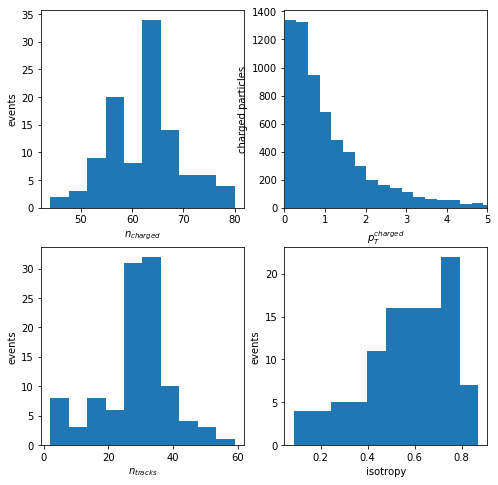

In [5]:
# check the basic output looks ok
suep125.basicPlots()

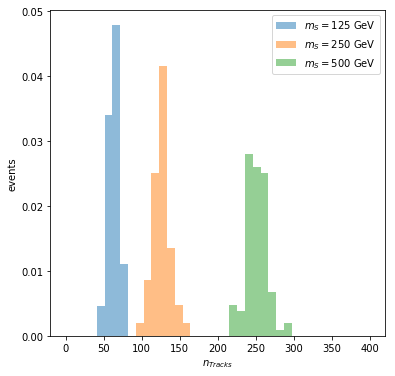

In [20]:
# now let's do some comparison plots
import matplotlib.pyplot as plt
import numpy as np

# Start with the number of status 1 charged particles
# should see nCharged scales with mediator mass 
bins = np.linspace(0,400,40)
plt.figure(figsize=(6,6))
plt.hist(suep125.nCharged, bins, alpha=0.5, label='$m_{S}=125$ GeV', normed=1)
plt.hist(suep250.nCharged, bins, alpha=0.5, label='$m_{S}=250$ GeV', normed=1)
plt.hist(suep500.nCharged, bins, alpha=0.5, label='$m_{S}=500$ GeV', normed=1)
plt.legend(loc='upper right')
plt.ylabel("events")
plt.xlabel("$n_{Tracks}$")
plt.show()

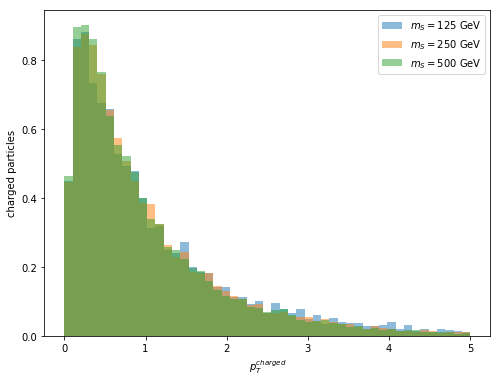

In [18]:
# charged particle pT 
# the pT spectra should be the same if dark meson mass and temperature are constant, regardless of mediator mass
bins = np.linspace(0,5,50)

plt.figure(figsize=(8,6))

plt.hist(suep125.chargedPt, bins, alpha=0.5, label='$m_{S}=125$ GeV', normed=1)
plt.hist(suep250.chargedPt, bins, alpha=0.5, label='$m_{S}=250$ GeV', normed=1)
plt.hist(suep500.chargedPt, bins, alpha=0.5, label='$m_{S}=500$ GeV', normed=1)

plt.legend(loc='upper right')
plt.ylabel("charged particles")
plt.xlabel("$p_{T}^{charged}$")
plt.show()

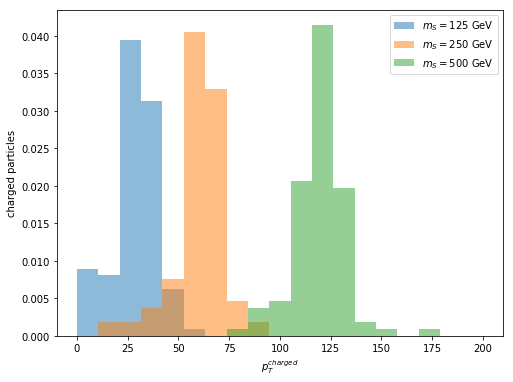

In [19]:
# nTracks in acceptance, pT > 7 GeV
bins = np.linspace(0,200,20)

plt.figure(figsize=(8,6))

plt.hist(suep125.nTracks, bins, alpha=0.5, label='$m_{S}=125$ GeV', normed=1)
plt.hist(suep250.nTracks, bins, alpha=0.5, label='$m_{S}=250$ GeV', normed=1)
plt.hist(suep500.nTracks, bins, alpha=0.5, label='$m_{S}=500$ GeV', normed=1)

plt.legend(loc='upper right')
plt.ylabel("events")
plt.xlabel("$n_{tracks}$")
plt.show()

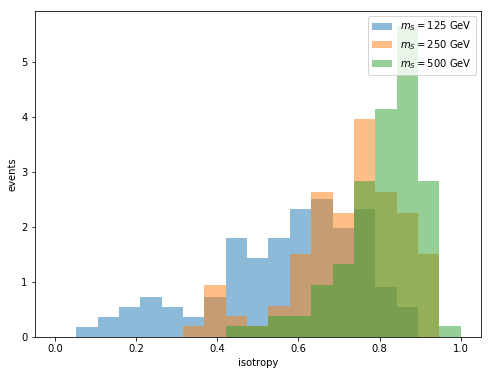

In [21]:
# isotropy, calculated from tracks in acceptance
bins = np.linspace(0,1,20)

plt.figure(figsize=(8,6))

plt.hist(suep125.isotropy, bins, alpha=0.5, label='$m_{S}=125$ GeV', normed=1)
plt.hist(suep250.isotropy, bins, alpha=0.5, label='$m_{S}=250$ GeV', normed=1)
plt.hist(suep500.isotropy, bins, alpha=0.5, label='$m_{S}=500$ GeV', normed=1)

plt.legend(loc='upper right')
plt.ylabel("events")
plt.xlabel("isotropy")
plt.show()